In [2]:

# normal 
import pandas as pd


# imports 
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

# Geo-location stuffs
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [28]:
# !conda install -c conda-forge geojson

In [ ]:
# ---

In [3]:
# loads in crash data

df = pd.read_csv('./data/crash_features_2020.csv')

In [4]:
df = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))

In [30]:
# df.shape

In [5]:
# Creates sample crash data

df = df.sample(2_000)

In [6]:
"""
    Creating Reduced Columns 

"""

# list of columns names

columns_names = list(df.columns)

#removing names of columns you want to KEEP

columns_names.remove('ZIP CODE')
columns_names.remove('BOROUGH')
columns_names.remove('LATITUDE')
columns_names.remove('LOCATION')
columns_names.remove('LONGITUDE')
columns_names.remove('CONTRIBUTING FACTOR VEHICLE 1')
columns_names.remove('CRASH TIME')
columns_names.remove('CRASH DATE')
columns_names.remove('date')
columns_names.remove('geometry')

#dropping the rest of the list 

df = df.drop(columns = columns_names, axis = 1)

In [7]:
df.head(2)

,date,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,CONTRIBUTING FACTOR VEHICLE 1,geometry
51608,2020-06-28,06/28/2020,12:50,NaN,NaN,40.646515,-73.974655,"(40.646515, -73.974655)",Following Too Closely,POINT (-73.97465 40.64652)
40823,2020-05-08,05/08/2020,14:27,NaN,NaN,40.761650,-73.827150,"(40.76165, -73.82715)",Failure to Yield Right-of-Way,POINT (-73.82715 40.76165)


In [7]:
type(df)

geopandas.geodataframe.GeoDataFrame

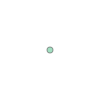

In [8]:
df.iloc[0,-1]

---

## Geo Data

#### Neighborhood polygon

In [9]:
# loads neighboorhood data

neighborhoods = gpd.read_file('./neighborhoods/d085e2f8d0b54d4590b1e7d1f35594c1pediacitiesnycneighborhoods.geojson.json')

In [10]:
# checks shape of data

neighborhoods.shape

(310, 5)

In [11]:
# looks at all brooklyn neighborhoods

neighborhoods[neighborhoods['borough'] == 'Brooklyn']

,neighborhood,boroughCode,borough,@id,geometry
7,Bath Beach,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.99381 40.60195, -73.99962 40.596..."
9,Bay Ridge,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-74.01475 40.63397, -74.01475 40.633..."
16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.94115 40.70028, -73.90548 40.680..."
20,Bensonhurst,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.97300 40.60883, -73.97299 40.608..."
21,Bergen Beach,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.91732 40.63101, -73.90396 40.624..."
...,...,...,...,...,...
270,South Slope,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.97686 40.66461, -73.97685 40.664..."
278,Sunset Park,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.99280 40.66553, -73.99300 40.665..."
293,Vinegar Hill,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.97905 40.70597, -73.97906 40.705..."
303,Williamsburg,4,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.95757 40.72510, -73.95300 40.722..."


In [12]:
# Geo location  polygon for Astoria queens

astoria =  neighborhoods[neighborhoods['neighborhood'] == 'Astoria']
astoria

,neighborhood,boroughCode,borough,@id,geometry
6,Astoria,4,Queens,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.90160 40.76777, -73.90270 40.766..."


In [13]:
astoria['geometry']

6    POLYGON ((-73.90160 40.76777, -73.90270 40.766...
Name: geometry, dtype: geometry

In [15]:
#df['CRASH TIME'].splt(:)

In [15]:
# Hospitals 

# wrong gps locations going to update

# hospitals = gpd.read_file("./hospitals/nyu_2451_34494.shp")
# #hospitals.crs = {'init': 'epsg:4326'}
# hospitals.head(2)

## Geo calculation stuffs

In [16]:
# test points 

p1 = Point(24.952242, 60.1696017)
type(p1)

shapely.geometry.point.Point

In [17]:
# Test sample of point

a = df.iloc[0,-1]
type(a)

shapely.geometry.point.Point

In [18]:
# test of polygon

b = astoria.geometry.iloc[0]
type(b)

shapely.geometry.polygon.Polygon

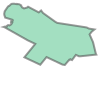

In [20]:
b

In [19]:
# Checks intercept of polygon, using the command - contains - 

b.contains(a)

False

In [20]:
# apply the contains method to to polygon and points 

poly = astoria.geometry.iloc[0]
print(type(poly)) 
print()
for i, j in df.iterrows():
    if (poly.contains(j['geometry'])):
        print(i)
    


<class 'shapely.geometry.polygon.Polygon'>

76099
933
30579
46165
3552
2992
72140
19049
76813
45496
19465
50689
68573
32005
69232
5463
9740
29387
24715
1542
45110
47685
23303
45765
34870


### MAP test

In [90]:
# map with dots that we can color code


m_1 = folium.Map(location=[40.734603, -73.9903599], tiles='cartodbpositron', zoom_start=10.5)

def color_producer(val):
    if val <= 12:
        return 'forestgreen'
    else:
        return 'darkred'

    
    
    
    
# Add a bubble map to the base map
for i in range(0,len(df)):
    Circle(
        location=[df.iloc[i]['LATITUDE'], df.iloc[i]['LONGITUDE']],
        radius=20,
        color='forestgreen').add_to(m_1) #df.iloc[i]['CRASH TIME'])

m_1


In [21]:
# Map that clusters the crashes 



m_2 = folium.Map(location=[40.734603, -73.9903599], tiles='cartodbpositron', zoom_start=10.5)

mc = MarkerCluster()
for idx, row in df.iterrows():
    #if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
    mc.add_child(Marker([row['LATITUDE'], row['LONGITUDE']]))
m_2.add_child(mc)

for i in range(0,len(df)):
    Circle(
        location=[df.iloc[i]['LATITUDE'], df.iloc[i]['LONGITUDE']],
        radius=20,
        color='forestgreen').add_to(m_2)

m_2

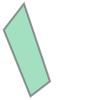

In [22]:
# Putting GPS into poly

from shapely.geometry import Point, Polygon
# Create a Polygon
name = 'NYC Random'
coords = [(40.759065, -73.972547), (40.766538, -73.966819), (40.756557, -73.937058), (40.748790, -73.947085)]
poly = Polygon(coords)
poly

---

In [23]:
df

,date,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,CONTRIBUTING FACTOR VEHICLE 1,geometry
70183,2020-09-02,09/02/2020,16:20,BRONX,10451.0,40.814365,-73.930110,"(40.814365, -73.93011)",Failure to Yield Right-of-Way,POINT (-73.93011 40.81437)
32817,2020-03-17,03/17/2020,17:05,BRONX,10468.0,40.859303,-73.898840,"(40.859303, -73.89884)",Unspecified,POINT (-73.89884 40.85930)
1019,2020-01-03,01/03/2020,14:50,BROOKLYN,11201.0,40.702560,-73.993540,"(40.70256, -73.99354)",Unsafe Lane Changing,POINT (-73.99354 40.70256)
1289,2020-01-04,01/04/2020,6:00,NaN,NaN,40.666603,-73.913870,"(40.666603, -73.91387)",Unspecified,POINT (-73.91387 40.66660)
39937,2020-05-03,05/03/2020,20:23,NaN,NaN,40.526077,-74.187590,"(40.526077, -74.18759)",Drugs (illegal),POINT (-74.18759 40.52608)
...,...,...,...,...,...,...,...,...,...,...
70497,2020-09-03,09/03/2020,10:20,BRONX,10457.0,40.843136,-73.910970,"(40.843136, -73.91097)",Passing Too Closely,POINT (-73.91097 40.84314)
28842,2020-03-07,03/07/2020,7:00,QUEENS,11427.0,40.734642,-73.741450,"(40.734642, -73.74145)",Driver Inattention/Distraction,POINT (-73.74145 40.73464)
52651,2020-07-02,07/02/2020,15:35,QUEENS,11369.0,40.759680,-73.864075,"(40.75968, -73.864075)",Traffic Control Disregarded,POINT (-73.86407 40.75968)
12608,2020-01-30,01/30/2020,23:00,QUEENS,11429.0,40.711468,-73.731500,"(40.711468, -73.7315)",Unspecified,POINT (-73.73150 40.71147)


In [24]:
astoria =  { "type": "Feature", "properties": { "neighborhood": "Astoria", "boroughCode": "4", "borough": "Queens", "@id": "http:\/\/nyc.pediacities.com\/Resource\/Neighborhood\/Astoria" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.901603050647381, 40.76777029715587 ], [ -73.902696381322897, 40.766889286534429 ], [ -73.903569, 40.76578 ], [ -73.902184, 40.76267 ], [ -73.90108, 40.758122 ], [ -73.900866256516622, 40.757673593458776 ], [ -73.90737, 40.75698800000022 ], [ -73.907828, 40.756999000000249 ], [ -73.90907, 40.757565000000184 ], [ -73.910618, 40.755476000000172 ], [ -73.911294, 40.755814000000257 ], [ -73.911568, 40.755480000000148 ], [ -73.911764, 40.755573000000211 ], [ -73.913519212221317, 40.753495965965669 ], [ -73.914467, 40.753661 ], [ -73.920865, 40.756678 ], [ -73.923372, 40.753594 ], [ -73.929751, 40.756581 ], [ -73.92538, 40.76197 ], [ -73.928425, 40.763416 ], [ -73.93779, 40.7687 ], [ -73.93806383243512, 40.768771395253452 ], [ -73.937576325173325, 40.768923994184931 ], [ -73.936814606547301, 40.768903947478414 ], [ -73.936814549235208, 40.768904133836244 ], [ -73.936685391194146, 40.76913305469089 ], [ -73.936707379891928, 40.769252609074108 ], [ -73.936403817362134, 40.769474884014301 ], [ -73.936169139195655, 40.7695161146545 ], [ -73.93574021432643, 40.769367229866475 ], [ -73.935739008950634, 40.769368192359138 ], [ -73.935733075943389, 40.76936722986683 ], [ -73.935240168311893, 40.769679325462953 ], [ -73.934895338945594, 40.770041862889499 ], [ -73.93469499066984, 40.770425338525115 ], [ -73.935147154026012, 40.770541956058402 ], [ -73.935008138722253, 40.771162394866536 ], [ -73.934940272005008, 40.771164020932744 ], [ -73.934904812826517, 40.771270641186661 ], [ -73.934527301094533, 40.771176775103328 ], [ -73.934485483039069, 40.771306523218435 ], [ -73.934857909749041, 40.771382912969109 ], [ -73.934870181634281, 40.771353610688053 ], [ -73.934953987149896, 40.771372943016843 ], [ -73.934929433198675, 40.771440236090079 ], [ -73.934837152998128, 40.771420135309732 ], [ -73.934842826975185, 40.771395793192305 ], [ -73.934480150890622, 40.771323068200346 ], [ -73.934479916675571, 40.771323794916015 ], [ -73.934435257431787, 40.771462362333402 ], [ -73.934826227617009, 40.771576958073268 ], [ -73.934799675058713, 40.771734138890096 ], [ -73.9374592469878, 40.772531495125364 ], [ -73.937806221312186, 40.773562894648123 ], [ -73.937858118227766, 40.774087568973023 ], [ -73.937647692525204, 40.775085685383942 ], [ -73.936380228175423, 40.77692145656264 ], [ -73.936089196991006, 40.777184322077026 ], [ -73.935854526415042, 40.777211684624177 ], [ -73.93508232492151, 40.777944233727773 ], [ -73.934743530112868, 40.778076335377023 ], [ -73.933904413486019, 40.778116665974281 ], [ -73.932774778676674, 40.777922388777903 ], [ -73.932722104539678, 40.778034767117958 ], [ -73.931788343051679, 40.777870607104916 ], [ -73.931049642989578, 40.777441897312087 ], [ -73.931073771467638, 40.777260594398257 ], [ -73.930628565541824, 40.776590902749632 ], [ -73.92988058500103, 40.776221631901947 ], [ -73.929876093378581, 40.776222938582578 ], [ -73.929873446617734, 40.776221631902132 ], [ -73.928598011850681, 40.776592675101142 ], [ -73.928277308327182, 40.7768989753244 ], [ -73.923976023757618, 40.774621998674348 ], [ -73.923035613431495, 40.775387278507253 ], [ -73.922323164184647, 40.774414625567033 ], [ -73.917261836015726, 40.77078466951928 ], [ -73.916563398809217, 40.770404609262215 ], [ -73.905604677955537, 40.768716808251995 ], [ -73.904666914228073, 40.768544567933368 ], [ -73.903905667125684, 40.768139880759733 ], [ -73.901603050647381, 40.76777029715587 ] ] ] } }

In [25]:
type(astoria)

dict

In [26]:
 from geojson import Feature, Point, FeatureCollection

ModuleNotFoundError: No module named 'geojson'

In [ ]:
gpd.GeoDataFrame(astoria)

In [80]:
geo =  gpd.GeoSeries(astoria)

<ipython-input-80-1883d8ab72d4>:1: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  geo =  gpd.GeoSeries(astoria)


In [57]:
geo

type                                                    Feature
properties    {'neighborhood': 'Astoria', 'boroughCode': '4'...
geometry      {'type': 'Polygon', 'coordinates': [[[-73.9016...
dtype: object

In [55]:
df = gpd.read_file(astoria)

AttributeError: 'dict' object has no attribute 'startswith'

In [40]:
from shapely.geometry import shape

In [54]:
geom = [shape(i) for i in astoria]

AttributeError: 'str' object has no attribute 'get'

In [ ]:


import geopandas as gpd

fname = "./data/2013-04-29-Running.geojson"

df = gpd.read_file(fname)

print(type(df))


In [52]:
gpd.GeoDataFrame({'geometry':geom})

NameError: name 'geom' is not defined

In [46]:
astoria2 =  astoria["geometry"]['coordinates']